In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def split_photo(image_path):
    year = image_path[-8:-4]
    image = cv2.imread(image_path)
    rows = image.shape[0]
    columns = image.shape[1]
    for i in range(4):
        for j in range(4):
            matrix = image[int(rows/4)*i: int(rows/4)*(i+1) ,int(columns/4)*j: int(columns/4)*(j+1)]
            filename = f"regional_photos/{year}_{4*i + (j+1)}.png"
            cv2.imwrite(filename, matrix)

In [3]:
def calculate_white_percentage(image_path, threshold_value):

    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    white_pixels = np.sum(gray_image > threshold_value)
    total_pixels = gray_image.size
    white_percentage = (white_pixels / total_pixels) * 100
    return white_percentage

In [4]:
directory = r"photos"
paths = []
for filename in os.listdir(directory):
    path = os.path.join(directory, filename)
    paths.append(path)

for path in paths:
    split_photo(path)

In [5]:
directory = r"regional_photos"
regional_paths = []
for filename in os.listdir(directory):
    path = os.path.join(directory, filename)
    regional_paths.append(path)

percentages = []
for path in regional_paths:
    white_percentage = calculate_white_percentage(path, 200)
    percentages.append(white_percentage)
    print(f"Percentage of white pixels: {white_percentage:.2f}%")

Percentage of white pixels: 78.53%
Percentage of white pixels: 67.92%
Percentage of white pixels: 76.17%
Percentage of white pixels: 66.76%
Percentage of white pixels: 29.13%
Percentage of white pixels: 26.05%
Percentage of white pixels: 61.43%
Percentage of white pixels: 65.29%
Percentage of white pixels: 85.23%
Percentage of white pixels: 66.72%
Percentage of white pixels: 87.65%
Percentage of white pixels: 88.42%
Percentage of white pixels: 75.82%
Percentage of white pixels: 87.98%
Percentage of white pixels: 83.44%
Percentage of white pixels: 93.27%
Percentage of white pixels: 78.53%
Percentage of white pixels: 67.92%
Percentage of white pixels: 76.17%
Percentage of white pixels: 66.76%
Percentage of white pixels: 29.13%
Percentage of white pixels: 26.05%
Percentage of white pixels: 61.43%
Percentage of white pixels: 65.29%
Percentage of white pixels: 85.23%
Percentage of white pixels: 66.72%
Percentage of white pixels: 87.65%
Percentage of white pixels: 88.42%
Percentage of white 

In [9]:
percentages_array = np.array(percentages)

reshaped_array = percentages_array.reshape(16, -1).T

column_names = ['Region 1', 'Region 10', 'Region 11', 'Region 12', 'Region 13', 'Region 14', 'Region 15', 'Region 16', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9']

regional_data = pd.DataFrame(reshaped_array, columns=column_names)

In [10]:
drop_1 = regional_data[['Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9']]

drop_2 = regional_data[['Region 10', 'Region 11', 'Region 12', 'Region 13', 'Region 14', 'Region 15', 'Region 16']]

regional_data.drop(columns = ['Region 10', 'Region 11', 'Region 12', 'Region 13', 'Region 14', 'Region 15', 'Region 16', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9'], inplace = True)

regional_data = pd.concat([regional_data, drop_1, drop_2], axis=1)

regional_data['years'] = range(1984, 2021)

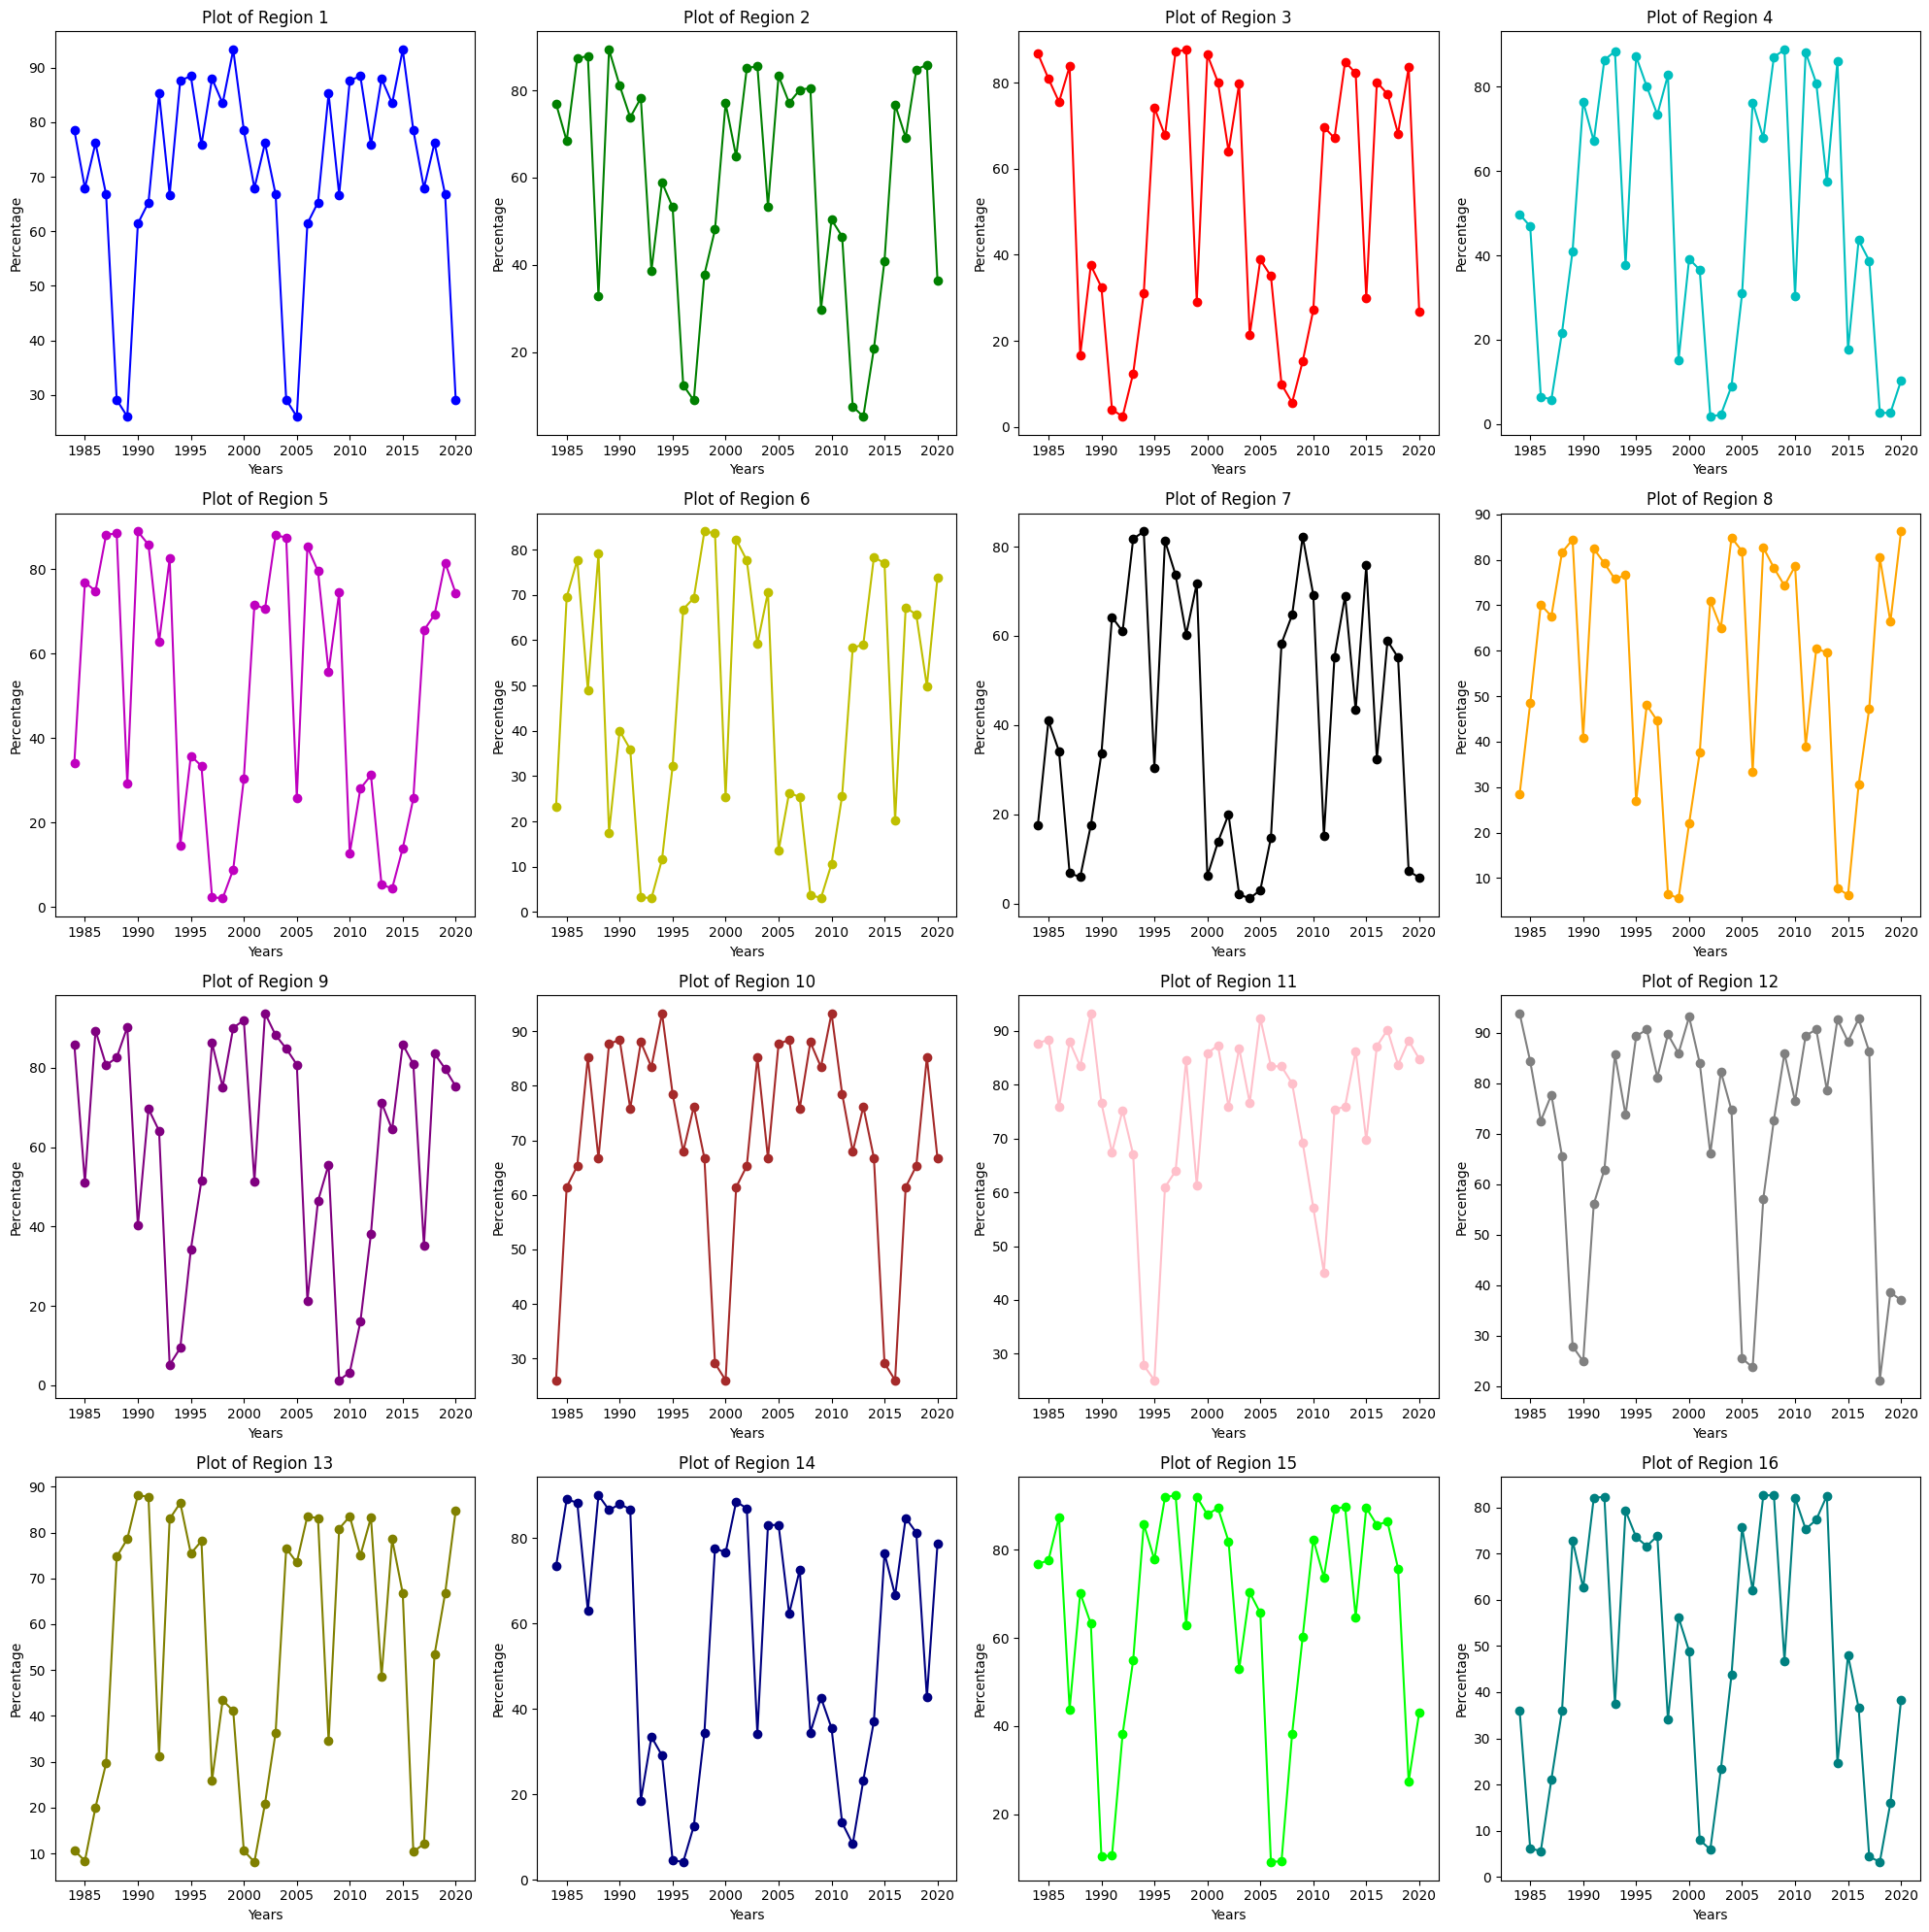

In [23]:
# Define the colors and regions
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'navy', 'lime', 'teal']
regions = [f'Region {i+1}' for i in range(16)]

# Create a figure with 16 subplots (4 rows, 4 columns)
plt.figure(figsize=(20, 20))

# Loop through each region and create a subplot for each
for i, region in enumerate(regions):
    plt.subplot(4, 4, i+1)  # 4 rows, 4 columns, current subplot
    plt.scatter(regional_data['years'], regional_data[region], color=colors[i], label=region)
    plt.plot(regional_data['years'], regional_data[region], color=colors[i])
    plt.title(f'Plot of {region}')
    plt.xlabel('Years')
    plt.ylabel('Percentage')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [24]:
regional_data.to_csv("data/regional_white_percentage_df.csv", index=False)